## Handwritten Digit Recognition system using the MNIST dataset

### Importing Necessary Libraries

In [31]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
import matplotlib.pyplot as plt

### Loading the MNIST dataset

In [32]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [33]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [24]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [25]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

5


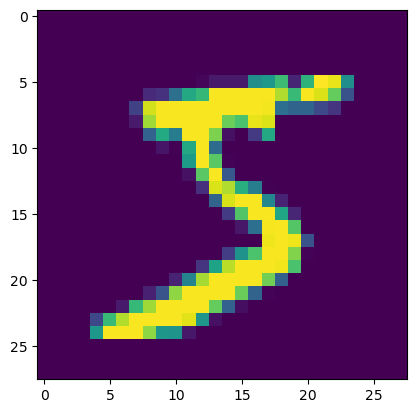

In [26]:
plt.imshow(X_train[0])
print(y_train[0])

### Scaling the Dataset

In [52]:
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

In [53]:
X_train_scaled[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Visualizing the Data

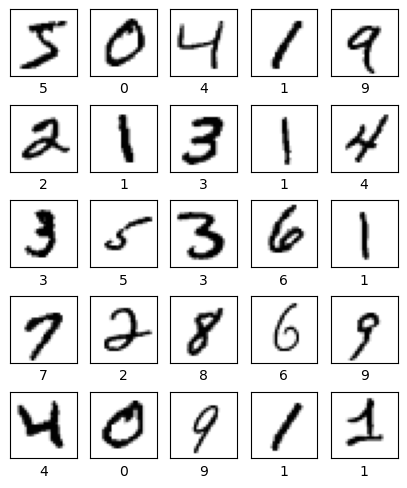

In [81]:
plt.figure(figsize=(5, 6))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train_scaled[i], cmap=plt.cm.binary)
    plt.xlabel(str(y_train[i]))
    plt.xticks([]), plt.yticks([])
plt.show()

### Building the Neural Network Model

In [55]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

### Compiling the Model

In [56]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training the Model

In [38]:
history = model.fit(X_train_scaled, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3263 - accuracy: 0.9064 - val_loss: 0.1618 - val_accuracy: 0.9529
Epoch 2/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1618 - accuracy: 0.9524 - val_loss: 0.1153 - val_accuracy: 0.9646
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1206 - accuracy: 0.9639 - val_loss: 0.0980 - val_accuracy: 0.9700
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0976 - accuracy: 0.9697 - val_loss: 0.0892 - val_accuracy: 0.9732
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0792 - accuracy: 0.9756 - val_loss: 0.0831 - val_accuracy: 0.9749
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0710 - accuracy: 0.9776 - val_loss: 0.0857 - val_accuracy: 0.9749
Epoch 7/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0622 - accuracy: 0.9799 - val_loss: 0.0810 - val_accuracy:

### Evaluating the Model

In [39]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0850 - accuracy: 0.9789
Test accuracy: 0.9789000153541565


### Making Predictions

In [40]:
predictions = model.predict(X_test_scaled)

313/313 [==============================] - 1s 3ms/step


In [43]:
predictions

array([[4.7201722e-12, 1.0855261e-13, 4.8774360e-11, ..., 9.9999046e-01,
        1.2394556e-11, 9.5137921e-06],
       [3.8148329e-17, 3.1921263e-10, 1.0000000e+00, ..., 9.4851003e-29,
        2.6357665e-14, 3.3836751e-25],
       [3.9074192e-11, 9.9999225e-01, 7.6882486e-07, ..., 4.3398668e-06,
        2.5769743e-06, 1.8759626e-11],
       ...,
       [1.8509854e-24, 1.5330985e-17, 1.2710120e-18, ..., 1.9093875e-10,
        1.4449925e-13, 2.7559317e-08],
       [2.8956094e-20, 2.2699452e-15, 1.3415569e-23, ..., 1.7695403e-17,
        2.3010648e-08, 1.6598224e-14],
       [5.8255666e-12, 1.1727547e-22, 3.2183756e-11, ..., 1.4922217e-20,
        6.1506052e-13, 1.0540241e-17]], dtype=float32)

### Visualizing Predicitions

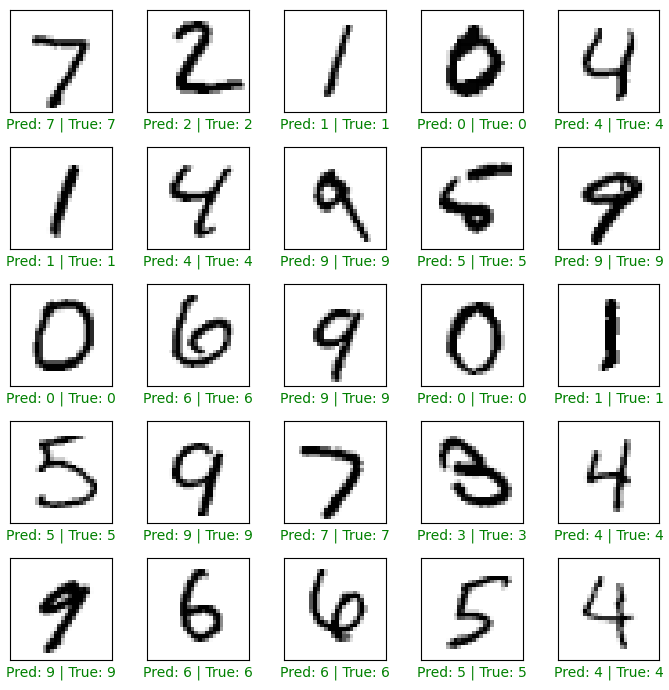

In [60]:
plt.figure(figsize=(7, 7))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test_scaled[i], cmap=plt.cm.binary)
    predicted_label = predictions[i].argmax()
    true_label = y_test[i]
    color = 'green' if predicted_label == true_label else 'red'
    plt.xlabel(f'Pred: {predicted_label} | True: {true_label}', color=color)
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

### Model Performance Metrics Evolution

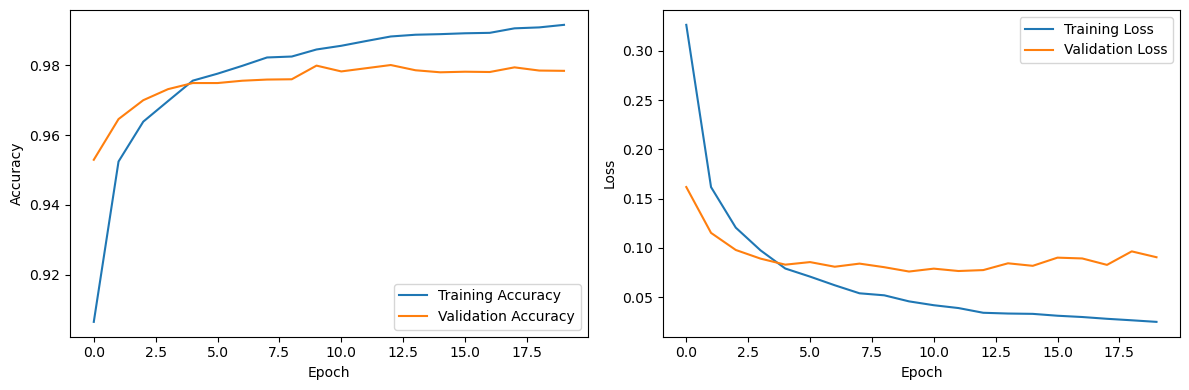

In [75]:
plt.figure(figsize=(12 , 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()